In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import *

from IPython.core.display import HTML

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Revisão de variáveis aleatórias

<h1>Sumário<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Variáveis-aleatórias-discretas" data-toc-modified-id="Variáveis-aleatórias-discretas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Variáveis aleatórias discretas</a></span><ul class="toc-item"><li><span><a href="#Variável-aleatória-com-distribuição-de-Bernoulli" data-toc-modified-id="Variável-aleatória-com-distribuição-de-Bernoulli-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Variável aleatória com distribuição de Bernoulli</a></span></li><li><span><a href="#Variável-aleatória-com-distribuição-de-Binomial" data-toc-modified-id="Variável-aleatória-com-distribuição-de-Binomial-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Variável aleatória com distribuição de Binomial</a></span></li></ul></li><li><span><a href="#Variáveis-aleatórias-contínuas" data-toc-modified-id="Variáveis-aleatórias-contínuas-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Variáveis aleatórias contínuas</a></span><ul class="toc-item"><li><span><a href="#Variável-aleatória-com-distribuição-uniforme" data-toc-modified-id="Variável-aleatória-com-distribuição-uniforme-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Variável aleatória com distribuição uniforme</a></span></li><li><span><a href="#Variável-aleatória-com-distribuição-de-Laplace" data-toc-modified-id="Variável-aleatória-com-distribuição-de-Laplace-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Variável aleatória com distribuição de Laplace</a></span></li><li><span><a href="#Variável-aleatória-com-distribuição-gaussiana" data-toc-modified-id="Variável-aleatória-com-distribuição-gaussiana-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Variável aleatória com distribuição gaussiana</a></span></li><li><span><a href="#Calculando-probabilidades" data-toc-modified-id="Calculando-probabilidades-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Calculando probabilidades</a></span></li></ul></li></ul></div>

## Variáveis aleatórias discretas

### Variável aleatória com distribuição de Bernoulli

Seja $X$ uma variável aleatória (v.a.) discreta com distribuição de Bernoulli com probabilidade $p$, i.e. $X \sim \mathrm{Bernoulli(p)}$, a função de massa de probablidade de $X$ será dada por

$$ f_X(X=k) = (1-p)\delta(k)+p\delta(k-1)$$

com $k \in\{0, 1\}, 0 \leq p \leq 1$.

In [2]:
# parâmetros da distribuição
p  = 0.25

X = bernoulli(p) # define uma v.a. X discreta com distribuição de bernoulli

x   = np.arange(-3, 5)

pmf = X.pmf(x) # função de massa de probabilidade de X
cdf = X.cdf(x) # Função distribuição acumulada de X

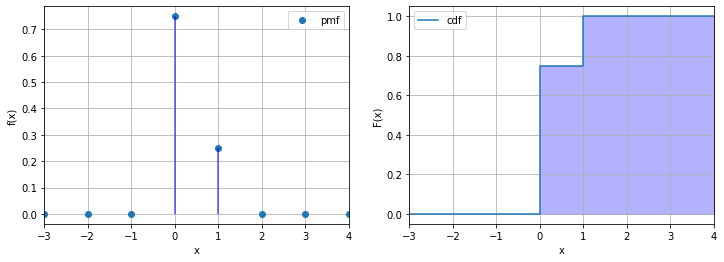

In [3]:
# plota fdp e fda da v.a. X
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(x, pmf,'o', label = 'pmf');
ax1.vlines(x, 0, X.pmf(x), colors='b', lw=2, alpha=0.5)
ax1.grid()
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)');
ax1.set_xlim(min(x), max(x));

ax2.step(x, cdf, where="post", label = 'cdf');
ax2.fill_between(x, cdf, step="post", color='blue', alpha=0.3)
ax2.grid()
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)');
ax2.set_xlim(min(x), max(x));

In [15]:
numVal = 200  # número de realizações a serem geradas da v.a. X

X_vals = X.rvs(size=numVal)

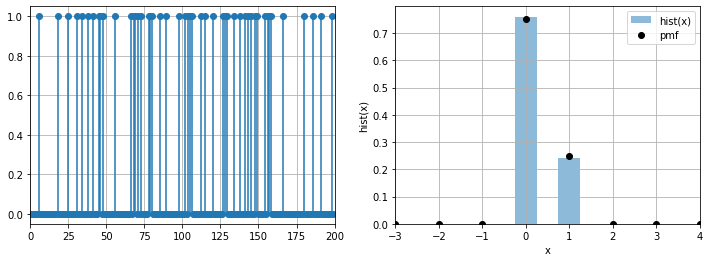

In [16]:
# plota valores e histograma
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.stem(X_vals, use_line_collection = True, basefmt=" ");
ax1.grid()
ax1.set_xlim(0,numVal);

ax2.hist(X_vals, density=True, bins=np.arange(min(x)+0.5, max(x)+0.5), rwidth = 0.5, label = 'hist(x)',alpha=0.5);
ax2.plot(x, pmf, 'ko', label = 'pmf', linewidth=2);
ax2.grid()
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('hist(x)');
ax2.set_xlim(min(x), max(x));

### Variável aleatória com distribuição de Binomial

Seja $X$ uma v.a. discreta com distribuição binomial com parâmetros $(n, p)$, i.e. $X \sim \mathrm{binomial(n,p)}$, a função de massa de probablidade de $X$ será dada por

$$ f_X(X=k) =\left(\begin{array}{l}n \\k \end{array}\right) p^{k}(1-p)^{n-k}$$


com $ k \in\{0,1, \ldots, n\}, 0 \leq p \leq 1$.

In [6]:
# parâmetros da distribuição
p  = 0.25
n  = 10 

X = binom(n, p) # define uma v.a. discreta X de distribuição binomial

x   = np.arange(-2, 11)

pmf = X.pmf(x) # função de massa de probabilidade de X
cdf = X.cdf(x) # Função distribuição acumulada de X

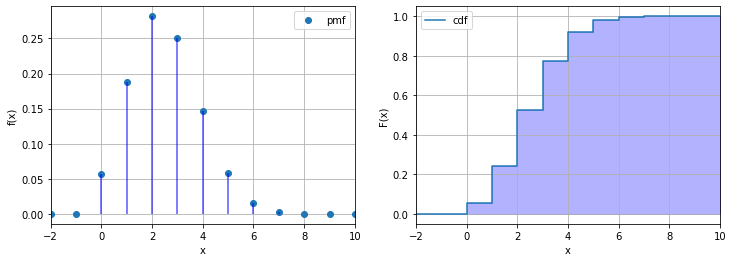

In [7]:
# plota fdp e fda da v.a. X
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(x, pmf,'o', label = 'pmf');
ax1.vlines(x, 0, X.pmf(x), colors='b', lw=2, alpha=0.5)
ax1.grid()
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)');
ax1.set_xlim(min(x), max(x));

ax2.step(x, cdf, where="post", label = 'cdf');
ax2.fill_between(x, cdf, step="post", color='blue', alpha=0.3)
ax2.grid()
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)');
ax2.set_xlim(min(x), max(x));

In [11]:
numVal = 100  # número de realizações a serem geradas da v.a. X

X_vals = X.rvs(size=numVal)

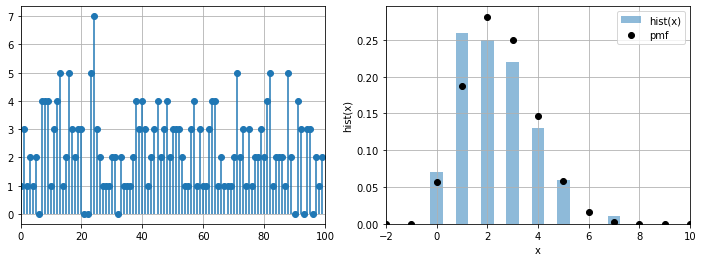

In [12]:
# plota valores e histograma
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.stem(X_vals, use_line_collection = True, basefmt=" ");
ax1.grid()
ax1.set_xlim(0,numVal);

ax2.hist(X_vals, density=True, bins=np.arange(min(x)-0.5, max(x)+0.5), rwidth = 0.5, label = 'hist(x)',alpha=0.5);
ax2.plot(x, pmf, 'ko', label = 'pmf', linewidth=2);
ax2.grid()
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('hist(x)');
ax2.set_xlim(min(x), max(x));

## Variáveis aleatórias contínuas

### Variável aleatória com distribuição uniforme

Seja $X$ uma v.a. contínua com distribuição uniforme no intervalo $(x_0, x_0+\Delta)$, i.e. $X \sim \mathrm{uniforme(x_0, x_0+\Delta)}$, a função densidade de probablidade de $X$ será dada por

$$
f_X(x)=\left\{\begin{array}{ll}
\frac{1}{\Delta} & \text { para } x_0 \leq x \leq x_0+\Delta, \\
0 & \text { para } x<x_0 \text { ou } x>x_0+\Delta
\end{array}\right.
$$

In [ ]:
# parâmetros da distribuição
x0  = 1
Δ   = 4

X = uniform(loc=x0, scale=Δ) # define uma v.a. X uniforme no intervalo (x0, x0+Δx)

x   = np.arange(x0-Δ/2,x0+3*Δ/2,0.01)

pdf = X.pdf(x) # função densidade de probabilidade de X
cdf = X.cdf(x) # Função distribuição acumulada de X

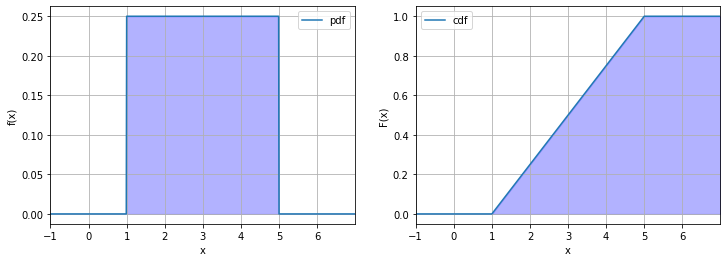

In [19]:
# plota fdp e fda da v.a. X
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(x, pdf, label = 'pdf');
ax1.fill_between(x, pdf, color='blue', alpha=0.3)
ax1.grid()
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)');
ax1.set_xlim(min(x), max(x));

ax2.plot(x, cdf, label = 'cdf');
ax2.fill_between(x, cdf, color='blue', alpha=0.3)
ax2.grid()
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)');
ax2.set_xlim(min(x), max(x));

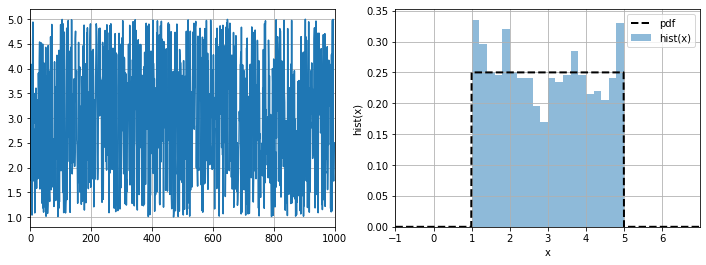

In [29]:
numVal = 1000  # número de realizações a serem geradas da v.a. X

X_vals = X.rvs(size=numVal)

# plota valores e histograma
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(X_vals);
ax1.grid()
ax1.set_xlim(0,numVal);

ax2.hist(X_vals, density=True, bins=20, label = 'hist(x)',alpha=0.5);
ax2.plot(x, pdf, 'k--', label = 'pdf', linewidth=2);
ax2.grid()
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('hist(x)');
ax2.set_xlim(min(x), max(x));

### Variável aleatória com distribuição de Laplace

Seja $X$ uma v.a. com distribuição de Laplace de parâmetros $(\mu, b)$, i.e. $X \sim \mathrm{Laplace(\mu, b)}$, a função densidade de probablidade de $X$ será dada por

$$
f_X(x)=\frac{1}{2b} \exp\left(-\frac{|x-\mu|}{b}\right)
$$

para $-\infty <x < \infty$.

In [13]:
# parâmetros da distribuição
μ  = 1
b  = 0.5

X = laplace(loc=μ, scale=b) # define uma v.a. de Laplace X com média μ e parâmetro de escala b

x   = np.arange(-8*b+μ,8*b+μ,0.01)

pdf = X.pdf(x) # função densidade de probabilidade de X
cdf = X.cdf(x) # Função distribuição acumulada de X

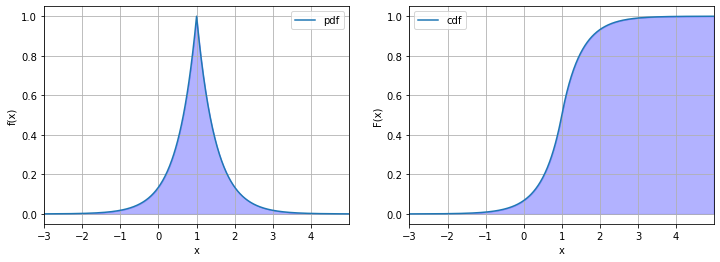

In [14]:
# plota fdp e fda da v.a. X
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(x, pdf, label = 'pdf');
ax1.fill_between(x, pdf, color='blue', alpha=0.3)
ax1.grid()
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)');
ax1.set_xlim(min(x), max(x));

ax2.plot(x, cdf, label = 'cdf');
ax2.fill_between(x, cdf, color='blue', alpha=0.3)
ax2.grid()
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)');
ax2.set_xlim(min(x), max(x));

In [15]:
numVal = 1000 # número de realizações a serem geradas da v.a. X

X_vals = X.rvs(size=numVal)

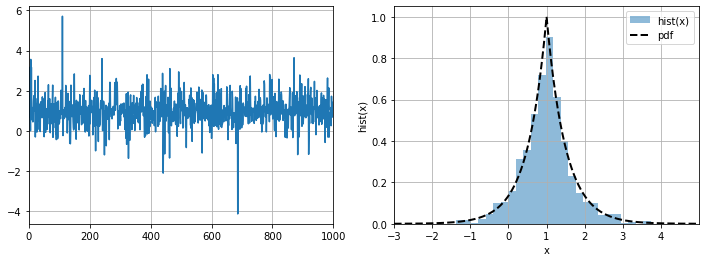

In [16]:
# plota valores e histograma
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(X_vals);
ax1.grid()
ax1.set_xlim(0,numVal);

ax2.hist(X_vals, density=True, bins=50, label = 'hist(x)',alpha=0.5);
ax2.plot(x, pdf, 'k--', label = 'pdf', linewidth=2);
ax2.grid()
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('hist(x)');
ax2.set_xlim(min(x), max(x));

### Variável aleatória com distribuição gaussiana

Seja $X$ uma v.a. contínua com distribuição normal (gaussiana) de parâmetros $(\mu, \sigma^2)$, i.e. $X \sim \mathcal{N}\mathrm{(\mu, \sigma^2)}$, a função densidade de probablidade de $X$ será dada por

$$
f_X\left(x\right)=\frac{1}{\sqrt{2 \pi \sigma^{2}}} e^{-\frac{(x-\mu)^{2}}{2 \sigma^{2}}}
$$

para $-\infty <x < \infty$.

In [17]:
# parâmetros da distribuição
μ  = 0.37
σ  = 0.5

X = norm(loc=μ, scale=σ) # define uma v.a. gaussiana X com média μ e desvio padrão σ

x   = np.arange(-5+μ, 5+μ,0.01)

pdf = X.pdf(x) # função densidade de probabilidade de X
cdf = X.cdf(x) # Função distribuição acumulada de X

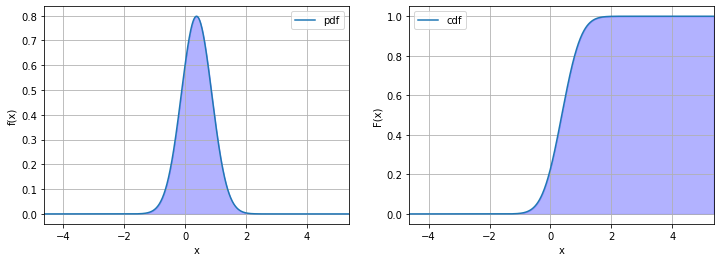

In [18]:
# plota fdp e fda da v.a. X
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(x, pdf, label = 'pdf');
ax1.fill_between(x, pdf, color='blue', alpha=0.3)
ax1.grid()
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)');
ax1.set_xlim(min(x), max(x));

ax2.plot(x, cdf, label = 'cdf');
ax2.fill_between(x, cdf, color='blue', alpha=0.3)
ax2.grid()
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)');
ax2.set_xlim(min(x), max(x));

In [19]:
numVal = 1000  # número de realizações a serem geradas da v.a. X

X_vals = X.rvs(size=numVal)

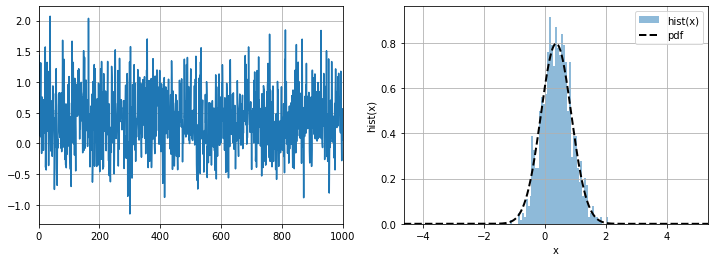

In [20]:
# plota valores e histograma
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.plot(X_vals);
ax1.grid()
ax1.set_xlim(0,numVal);

ax2.hist(X_vals, density=True, bins=50, label = 'hist(x)',alpha=0.5);
ax2.plot(x, pdf, 'k--', label = 'pdf', linewidth=2);
ax2.grid()
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('hist(x)');
ax2.set_xlim(min(x), max(x));

### Calculando probabilidades

$$\large P(a<X<b)=\int_a^b f_X(x)dx = F_X(b)-F_X(a)$$

In [47]:
def prob(X, a, b):
    '''
    calcula a probabilidade da v.a. X assumir valores 
    no intervalo [a, b].
    '''
    return X.cdf(b)-X.cdf(a)

In [58]:
prob(X, μ-2*σ, μ+2*σ)

0.9544997361036416

In [54]:
np.mean(X_vals)

0.3667253478818504

In [56]:
np.sqrt(np.var(X_vals))

0.500093363399676